#### Exploratory Data Analysis: Pre-Transformation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read in original dataset. 

In [2]:
df = pd.read_csv('../data/dataset.csv')

Set columns to lowercase. 

In [3]:
df.columns = df.columns.str.lower()

Set index to district ID. 

In [4]:
df.set_index('leaid', inplace=True)

Data definitions of values used in EDA:

Set columns to be selected features.

In [5]:
df = df[['name', 'stabbr', 'agchrt', 'v33',
         'totalrev', 'tfedrev', 'tstrev', 'tlocrev', 'totalexp', 'tcurelsc', 'tcapout',
         'a11', 'a13', 't06', 't40', 'u30', 
         'v10', 'v12', 'v14', 'v18', 'v24', 'v38', 'v93',
         'v11', 'v13', 'v17', 'v37',
         'z33', 'z35', 'z36', 'z37', 'z38',
         'w01', 'w31', 'w61',
         '_19h', '_21f', '_41f', '_61v', '_66v',
         'graduation rate']]

Create list of only numeric features to be explored. 

In [6]:
num_cols = df.drop(columns=['name', 'agchrt', 'stabbr', 'v33', 'graduation rate']).columns
num_cols

Index(['totalrev', 'tfedrev', 'tstrev', 'tlocrev', 'totalexp', 'tcurelsc',
       'tcapout', 'a11', 'a13', 't06', 't40', 'u30', 'v10', 'v12', 'v14',
       'v18', 'v24', 'v38', 'v93', 'v11', 'v13', 'v17', 'v37', 'z33', 'z35',
       'z36', 'z37', 'z38', 'w01', 'w31', 'w61', '_19h', '_21f', '_41f',
       '_61v', '_66v'],
      dtype='object')

List of corresponding names:

In [7]:
col_names = [
    'Total Revenue', 
    'Total Federal Revenue', 
    'Total State Revenue', 
    'Total Local Revenue',  
    'Total Expenditures', 
    'Total Elementary/Secondary Education Expenditures', 
    'Total Capital Outlay Expenditures',
    'Local Revenue - Textbook Sales and Rentals', 
    'Local Revenue - District Activity Receipts', 
    'Local Revenue - Property Taxes', 
    'Local Revenue - Individual and Corporate Income Taxes', 
    'Local Revenue - Fines and Forfeits', 
    'Employee Benefits - Instruction', 
    'Employee Beneifts - Pupil Support', 
    'Empolyee Benefits - Instructional Staff Support', 
    'Employee Benefits - School Admin. Support', 
    'Employee Benefits - Student Transportation Support', 
    'Employee Benefits - Business/Central Support', 
    'Textbooks',
    'Salaries - Pupil Support', 
    'Salaries - Instructional Staff Support', 
    'Salaries - School Admin. Support', 
    'Salaries - Business/Central Support',
    'Salaries - Instruction', 
    'Teacher Salaries (Regular Education)', 
    'Teacher Salaries (Special Education)', 
    'Teacher Salaries (Vocational)', 
    'Teacher Salaries (Other)',
    'Assets - Sinking Fund', 
    'Assets - Bond Fund', 
    'Assets - Other Funds',
    'Long Term Debt - Beginning of Year', 
    'Long Term Debt Issued', 
    'Long Term Debt - End of Year', 
    'Short Term Debt - Beginning of Year', 
    'Short Term Debt - End of Year'
]

Look at descriptive statistics:

In [9]:
np.round(df.describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
agchrt,11321.0,2.80,5.600000e-01,0.0,3.00,3.00,3.00,3.000000e+00
v33,11321.0,3964.10,1.296447e+04,-3.0,563.00,1341.00,3286.00,6.214140e+05
totalrev,11321.0,57101038.69,1.865596e+08,0.0,8240000.00,19155000.00,48701000.00,1.020084e+10
tfedrev,11321.0,4290352.62,1.884894e+07,0.0,470000.00,1097000.00,2955000.00,1.083978e+09
tstrev,11321.0,26232236.82,9.237361e+07,0.0,3719000.00,9100000.00,21381000.00,6.240975e+09
tlocrev,11321.0,26578449.25,9.154555e+07,0.0,2899000.00,7327000.00,21762000.00,3.470143e+09
totalexp,11321.0,57097917.76,1.837729e+08,0.0,7957000.00,18580000.00,48436000.00,9.755903e+09
tcurelsc,11321.0,47752608.07,1.530761e+08,0.0,6882000.00,16074000.00,41128000.00,8.232102e+09
tcapout,11321.0,5444244.85,2.062601e+07,0.0,236000.00,792000.00,3074000.00,8.663600e+08
a11,11321.0,17177.81,1.221929e+05,0.0,0.00,0.00,0.00,3.879000e+06


Looks like some features (a11, t40, etc.) are a majority zeroes--for some districts this could be accurate, but it might also be that zeroes are representing missing values.

#### Visualization

First we can look at the distribution of school district populations:

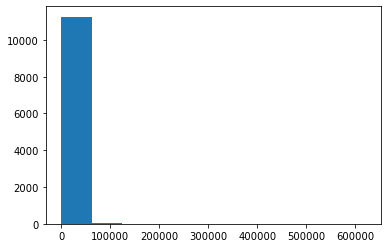

In [10]:
plt.hist(df['v33'])
plt.show()

It looks like the sizes are very unevenly distributed.

The smallest non-zero sized districts:

In [32]:
min(df[(df['v33'] > 0)]['v33'])

8.0

In [34]:
df[(df['v33'] < 10) & (df['v33'] > 0)]

,name,stabbr,agchrt,v33,totalrev,tfedrev,tstrev,tlocrev,totalexp,tcurelsc,...,z38,w01,w31,w61,_19h,_21f,_41f,_61v,_66v,graduation rate
leaid,,,,,,,,,,,,,,,,,,,,,
4109960,PLUSH SD 18,OR,3,8.0,358000.0,29000.0,264000.0,65000.0,287000.0,232000.0,...,0.0,0.0,384000.0,750000.0,0.0,0.0,0.0,0.0,0.0,0.500
618810,JEFFERSON ELEMENTARY,CA,3,9.0,236000.0,22000.0,118000.0,96000.0,311000.0,307000.0,...,0.0,0.0,0.0,248000.0,0.0,0.0,0.0,0.0,0.0,0.509


And the largest:

In [10]:
df[df['v33'] > 600000]

,name,stabbr,agchrt,v33,totalrev,tfedrev,tstrev,tlocrev,totalexp,tcurelsc,...,z38,w01,w31,w61,_19h,_21f,_41f,_61v,_66v,graduation rate
leaid,,,,,,,,,,,,,,,,,,,,,
622710,LOS ANGELES UNIFIED,CA,2,621414.0,1.020084e+10,1.083978e+09,6.240975e+09,2.875883e+09,9.755903e+09,8.232102e+09,...,27115000.0,885266000.0,1.591297e+09,3.464358e+09,1.077200e+10,1.557115e+09,1.141472e+10,0.0,0.0,0.801


This outlier is way too large to be included in a visualization, so instead we can set the window to extend to 10 times the median value.

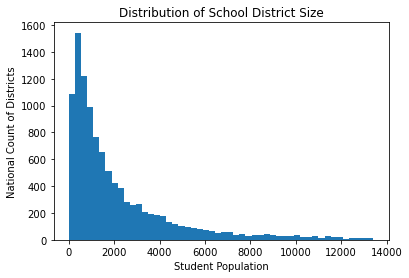

In [8]:
fig, ax = plt.subplots()
plt.hist(df['v33'], bins=50, range=(0, 10*np.median(df['v33'])))
plt.title('Distribution of School District Size')
plt.xlabel('Student Population')
plt.ylabel('National Count of Districts')
plt.show()

fig.savefig(f'./plots/population_hist.png')

Here we can see that the distribution is still heavily right-skewed, but the majority of districts falling into a range of a few thousand students. 

Next we can look at how distributions differ based on the charter status of each district.

In [12]:
# AGENCY CHARTER CODE
# 1 = All associated schools are charter schools
# 2 = Some but not all associated schools are 
#      charter schools
# 3 = No associated schools are charter schools
# 0 = Not applicable or code could not 
#      be determined

np.round(df.groupby('agchrt').mean().T, 2)

agchrt,0,1,2,3
v33,0.00,1010.90,1.839147e+04,3238.56
totalrev,10072351.35,11998649.61,2.509933e+08,47745199.90
tfedrev,1783270.27,936742.78,2.361210e+07,3261672.72
tstrev,3743648.65,7075293.96,1.157315e+08,21788132.35
tlocrev,4545432.43,3986612.86,1.116496e+08,22695394.83
totalexp,9670189.19,11374551.18,2.492228e+08,47910224.24
tcurelsc,8622054.05,10368476.38,2.083993e+08,40002756.09
tcapout,64189.19,729346.46,2.360268e+07,4609653.55
a11,0.00,673.23,1.988369e+04,18336.11
a13,21432.43,78395.01,1.874026e+06,294783.37


We can see that charter districts have smaller populations and lower graduation rates overall, as well as  expected lower revenues and expenditures. 

Generating histogram visuals of all the numeric features:

/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


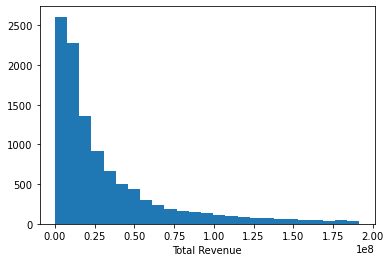

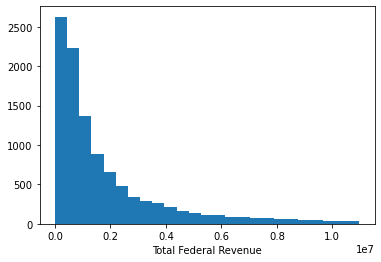

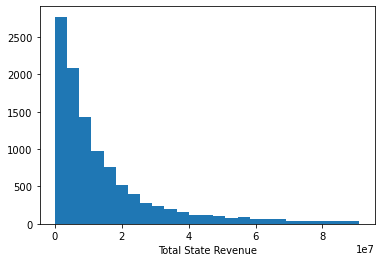

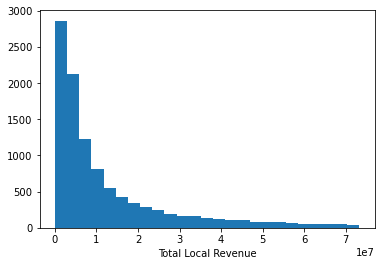

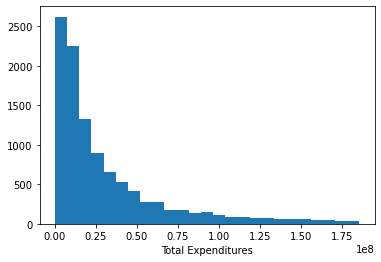

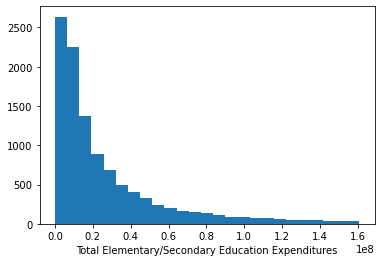

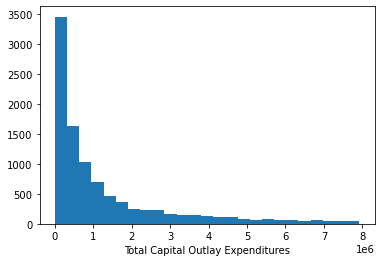

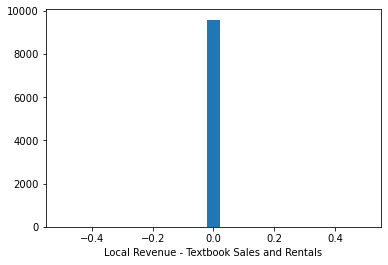

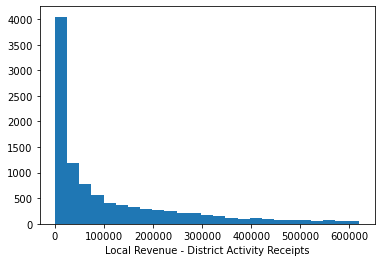

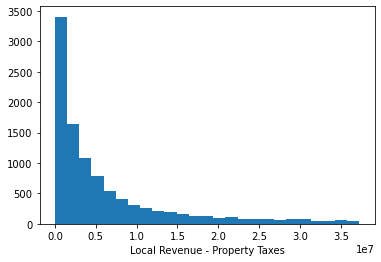

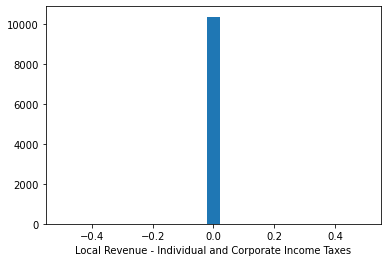

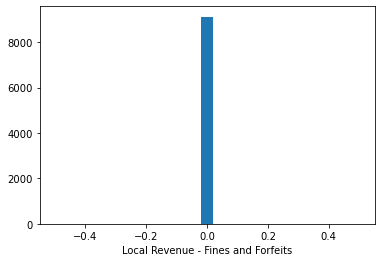

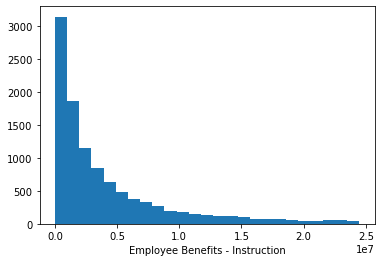

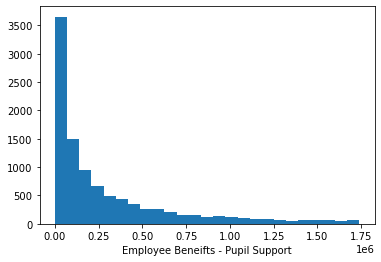

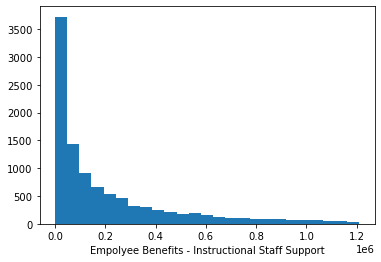

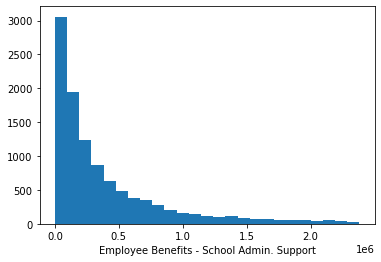

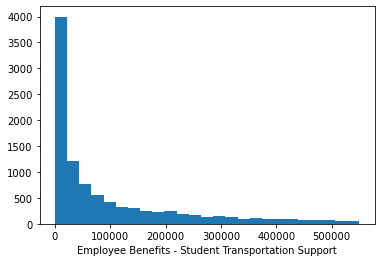

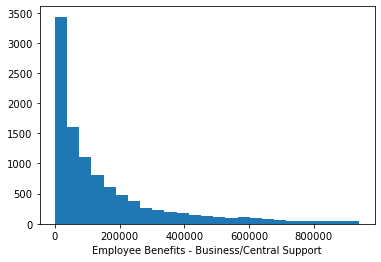

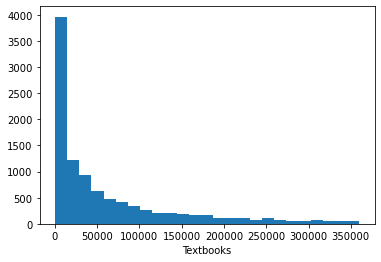

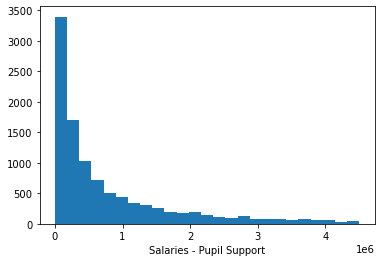

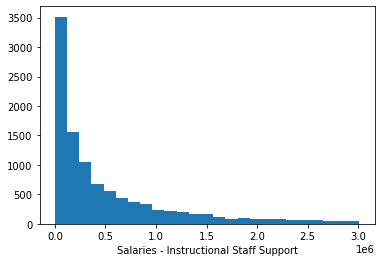

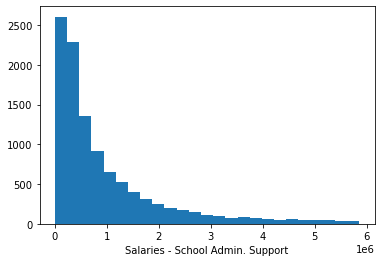

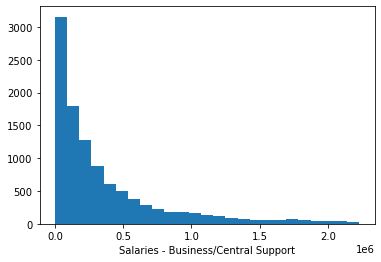

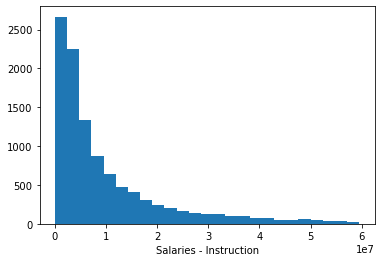

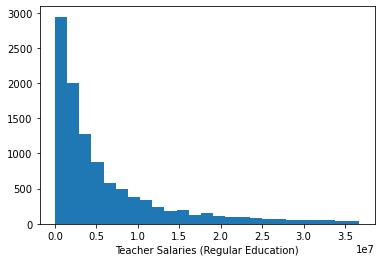

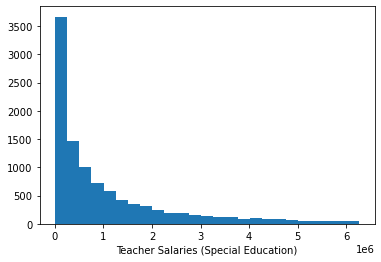

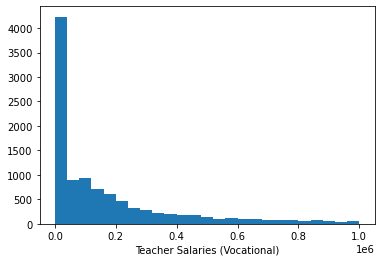

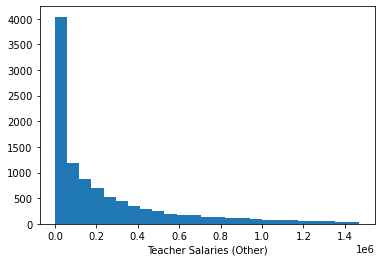

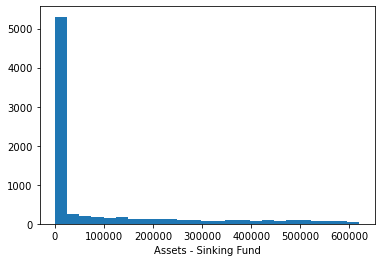

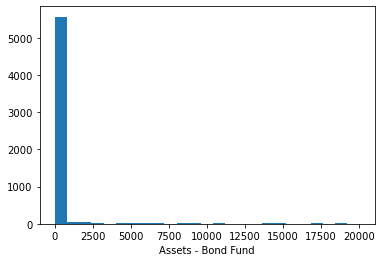

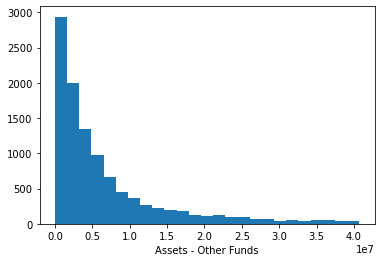

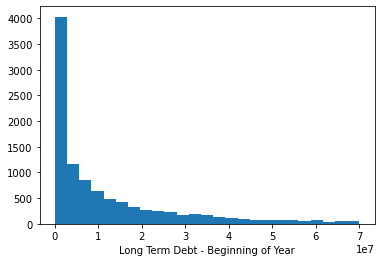

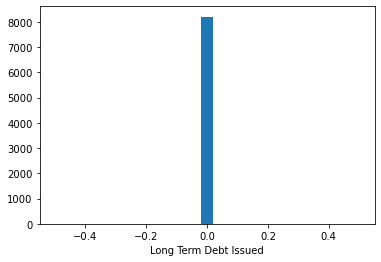

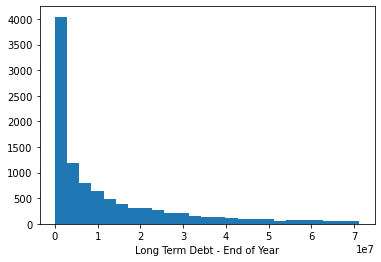

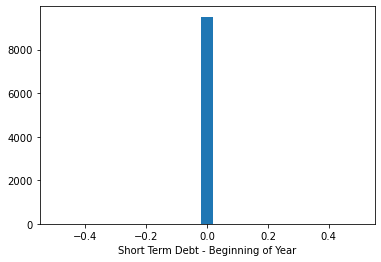

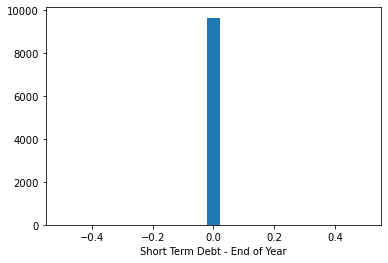

In [13]:
for col, name in zip(num_cols, col_names):
    fig, ax = plt.subplots()
    plt.hist(df[col], bins=25, range=(min(df[col]), 10*np.median(df[col])))
    plt.xlabel(name)
    fig.savefig(f'./plots/{col}_hist.png')

The features with variance all seem to be right-skewed, with very long tails. 

The financial features of each district aren't easily comparable seeing as there is such a large variation in the size of each district, so we can approximate a per capita measurement by dividing the row's features by the fall membership ('v33'). To do so we will have to drop the districts with incomplete student population numbers. 

In [14]:
no_pop = df[df['v33'] <= 0].index

df_percap = df.copy()
df_percap.drop(no_pop, inplace=True)

for col in num_cols:
    df_percap[col] = df_percap[col] / df_percap['v33']

In [15]:
df_percap

,name,stabbr,agchrt,v33,totalrev,tfedrev,tstrev,tlocrev,totalexp,tcurelsc,...,z38,w01,w31,w61,_19h,_21f,_41f,_61v,_66v,graduation rate
leaid,,,,,,,,,,,,,,,,,,,,,
2700001,MOUNTAIN IRON-BUHL,MN,3,507.0,16067.061144,871.794872,10199.211045,4996.055227,51548.323471,13214.990138,...,0.000000,422.090730,0.000000,28840.236686,58692.307692,0.000000,57869.822485,0.0,0.0,0.9355
2700005,UNITED SOUTH CENTRAL,MN,3,707.0,17315.417256,783.592645,10248.939180,6282.885431,15018.387553,12646.393211,...,8.486563,1575.671853,0.000000,6031.117397,36957.567185,0.000000,35203.677511,0.0,0.0,0.8810
2700006,MAPLE RIVER,MN,3,927.0,14134.843581,527.508091,10161.812298,3445.523193,13441.208198,12006.472492,...,122.977346,0.000000,0.000000,5977.346278,490.830636,0.000000,0.000000,0.0,0.0,0.9747
2700007,KINGSLAND,MN,3,557.0,14502.692998,671.454219,9459.605027,4371.633752,13247.755835,11055.655296,...,120.287253,1123.877917,0.000000,4317.773788,33863.554758,0.000000,32486.535009,0.0,0.0,0.9677
2700008,ST LOUIS COUNTY,MN,3,2007.0,19905.829596,926.756353,11405.082212,7573.991031,18933.233682,14161.933234,...,59.790732,2299.950174,0.000000,4022.421525,30174.389636,0.000000,28323.368211,0.0,0.0,0.8607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4033390,YARBROUGH,OK,3,89.0,19808.988764,2662.921348,6438.202247,10707.865169,16932.584270,16820.224719,...,0.000000,629.213483,123.595506,6325.842697,3303.370787,0.000000,1617.977528,0.0,0.0,1.0000
4033480,YUKON,OK,3,8781.0,8673.727366,503.815055,4403.826443,3766.085867,8564.742057,7165.357021,...,226.511787,0.000000,930.759595,2933.720533,4052.385833,2105.454960,5044.072429,0.0,0.0,0.9200
4033601,ROCK CREEK,OK,3,488.0,10403.688525,1903.688525,5696.721311,2803.278689,10375.000000,9977.459016,...,206.967213,190.573770,0.000000,2848.360656,717.213115,0.000000,543.032787,0.0,0.0,0.9000


The histograms of the per student variables:

/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


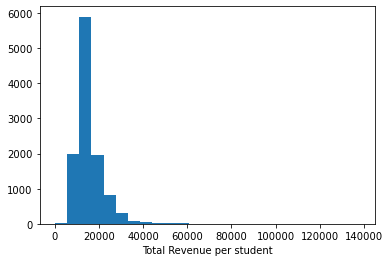

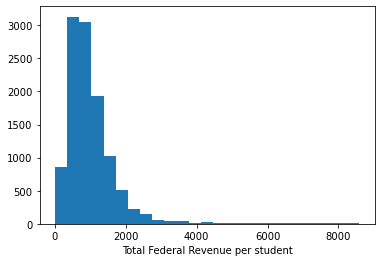

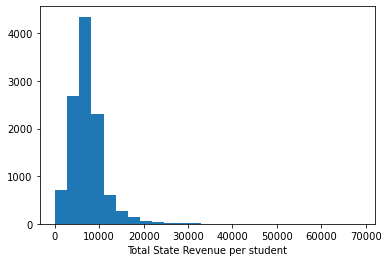

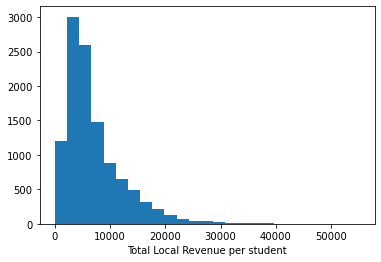

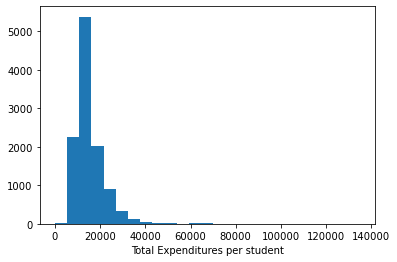

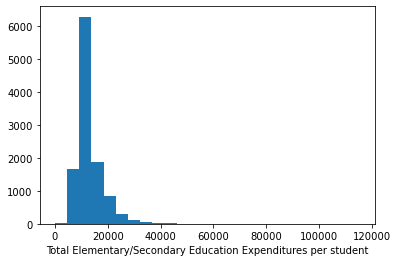

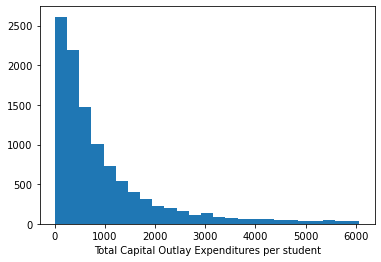

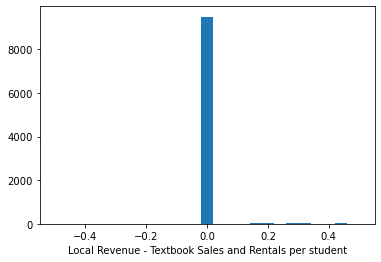

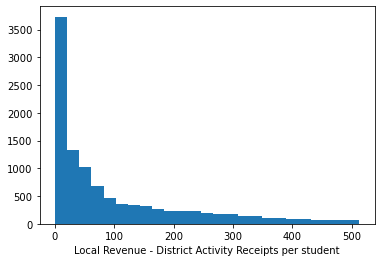

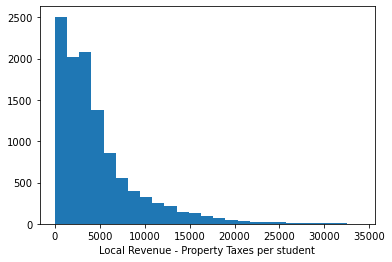

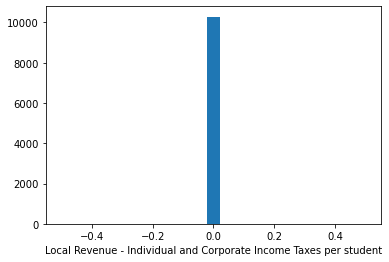

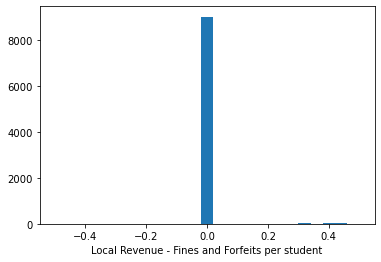

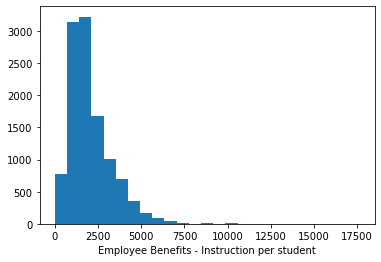

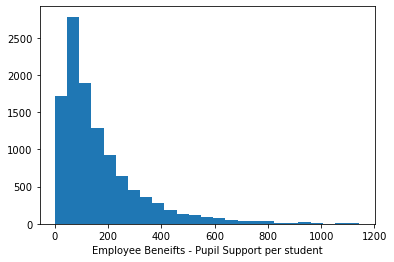

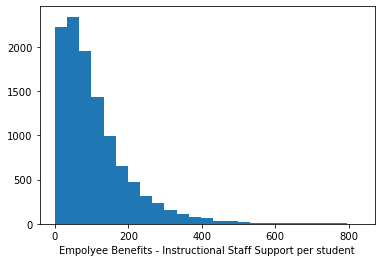

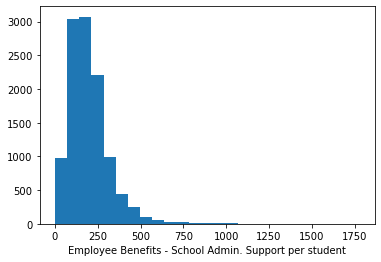

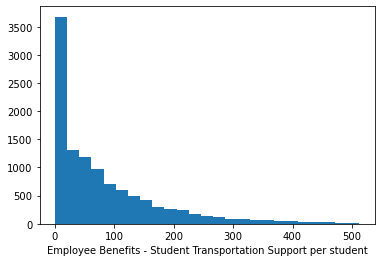

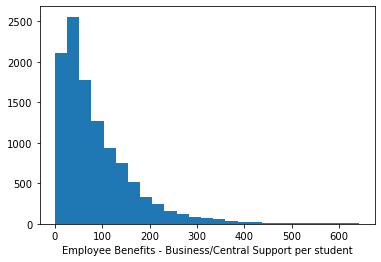

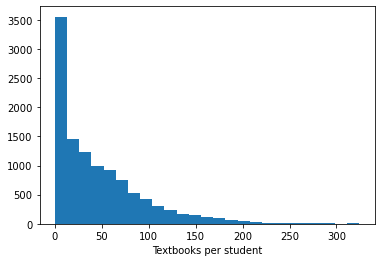

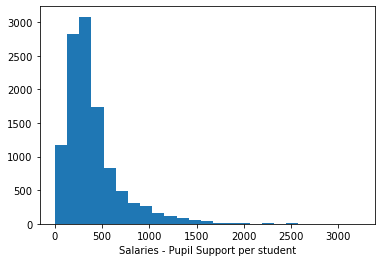

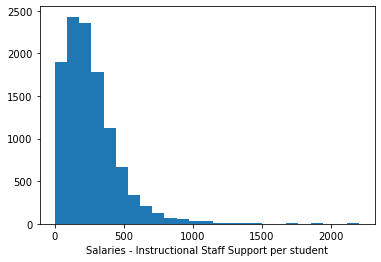

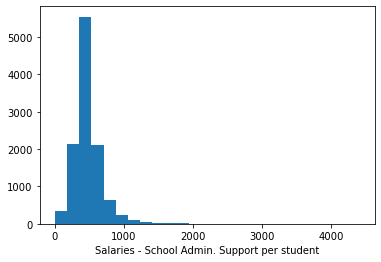

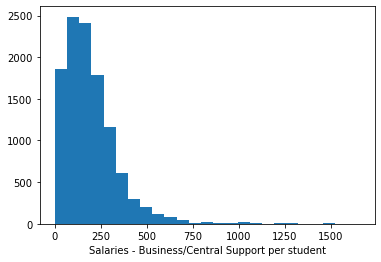

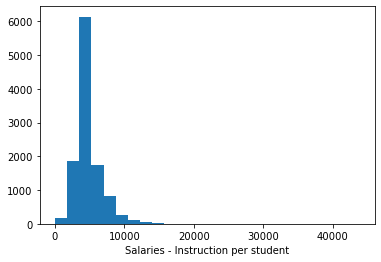

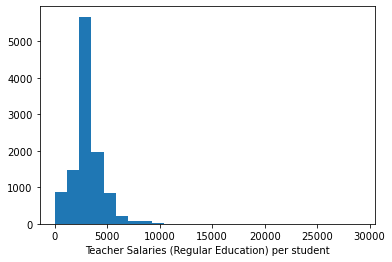

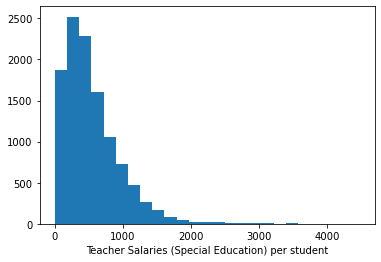

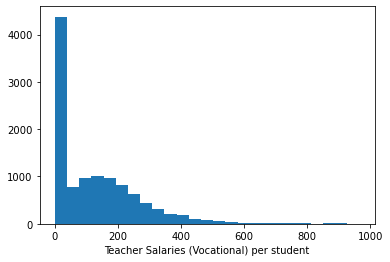

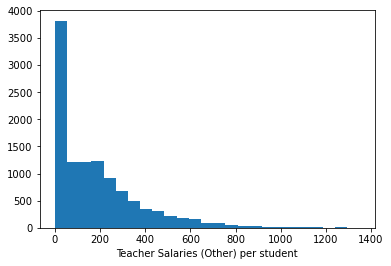

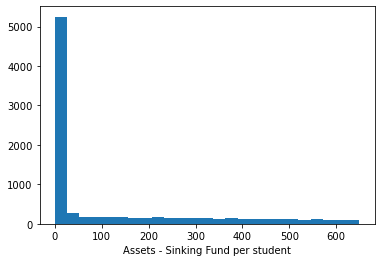

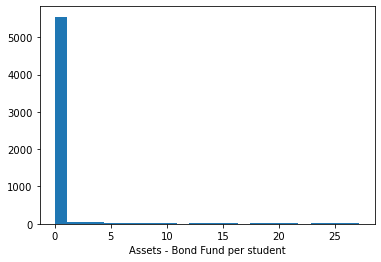

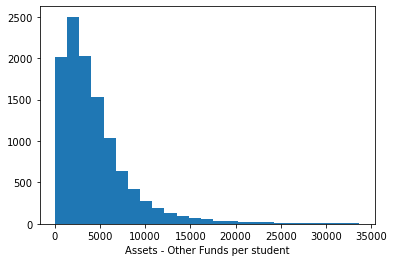

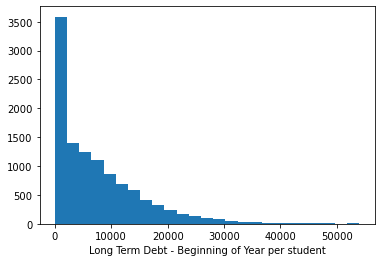

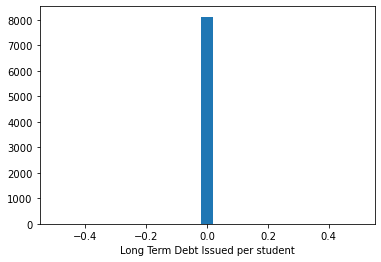

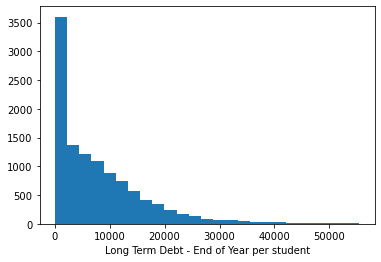

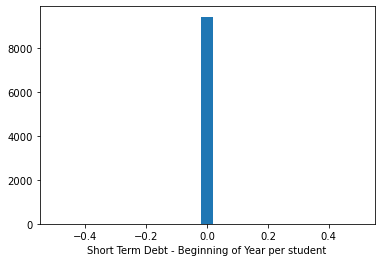

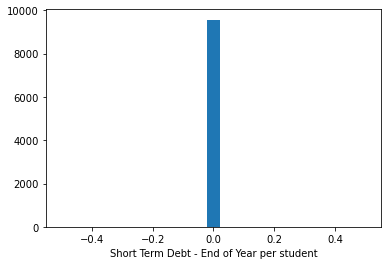

In [16]:
for col, name in zip(num_cols, col_names):
    fig, ax = plt.subplots()
    plt.hist(df_percap[col], bins=25, range=(min(df_percap[col]), 10*np.median(df_percap[col])))
    plt.xlabel(name + ' per student')
    fig.savefig(f'./plots/percap_{col}_hist.png')

While the graphs show more variance now, they are all still skewed. To fix this, we can scale the features logarithmically to better approximate a normal distribution. 